In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
845,ham,Meanwhile in the shit suite: xavier decided to...,NaN,NaN,NaN
435,ham,The message sent is askin for &lt;#&gt; dolla...,NaN,NaN,NaN
383,ham,Hey i will be late ah... Meet you at 945+,NaN,NaN,NaN
2497,ham,Dai what this da.. Can i send my resume to thi...,NaN,NaN,NaN
1271,ham,If you still havent collected the dough pls le...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3232,ham,Height of recycling: Read twice- People spend ...
3716,ham,I'm gonna rip out my uterus.
1499,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
4411,ham,If i said anything wrong sorry de:-)
246,ham,I asked you to call him now ok


In [9]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(4)

,target,text
4894,spam,Want the latest Video handset? 750 anytime any...
2893,ham,K...k...yesterday i was in cbe .
3436,ham,Then what about further plan?
1122,ham,Ok.ok ok..then..whats ur todays plan


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

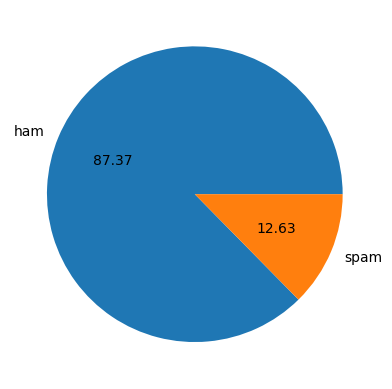

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f') 
plt.show()

* Data is imbalanced

In [21]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Abc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.sample(5)

,target,text,num_characters
4394,0,"Only just got this message, not ignoring you. ...",74
4593,0,I had a good time too. Its nice to do somethin...,106
1755,0,Really good:)dhanush rocks once again:),39
1852,1,This is the 2nd time we have tried 2 contact u...,154
94,0,Havent planning to buy later. I check already ...,107


In [27]:
df['text'].apply(lambda x: nltk.word_tokenize(x))
# converted all words into a list for each record.

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

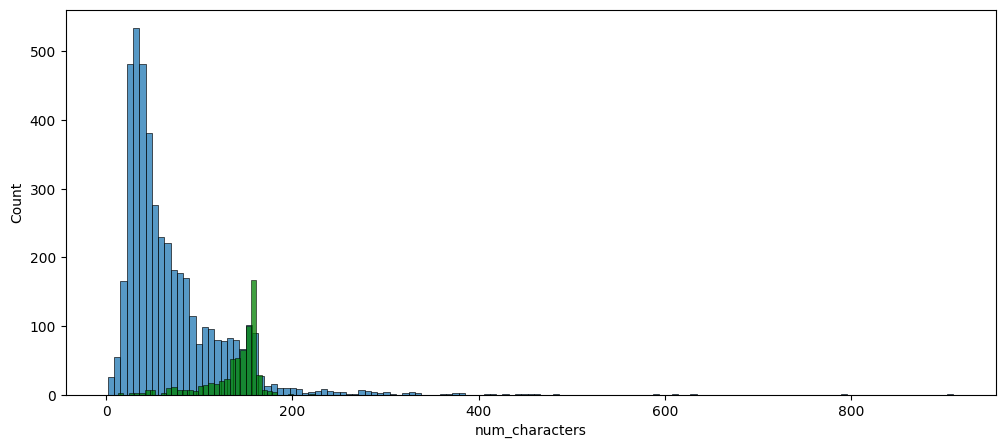

In [36]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='green')
plt.show()

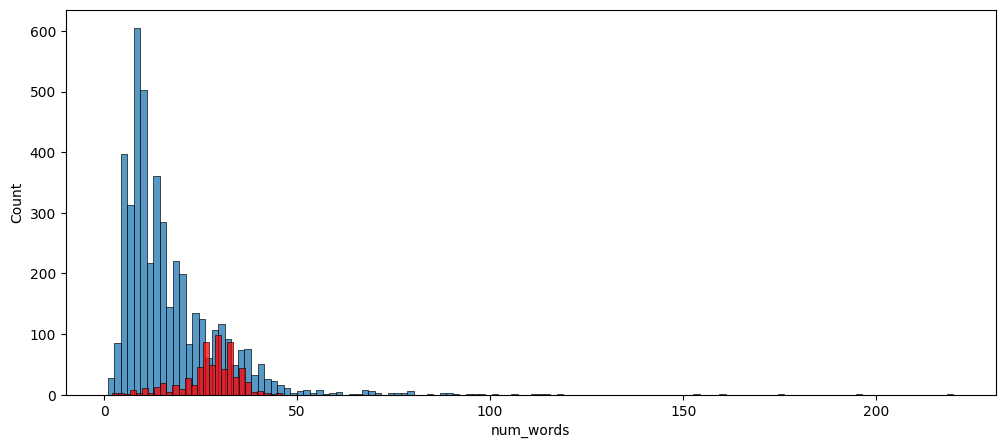

In [37]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

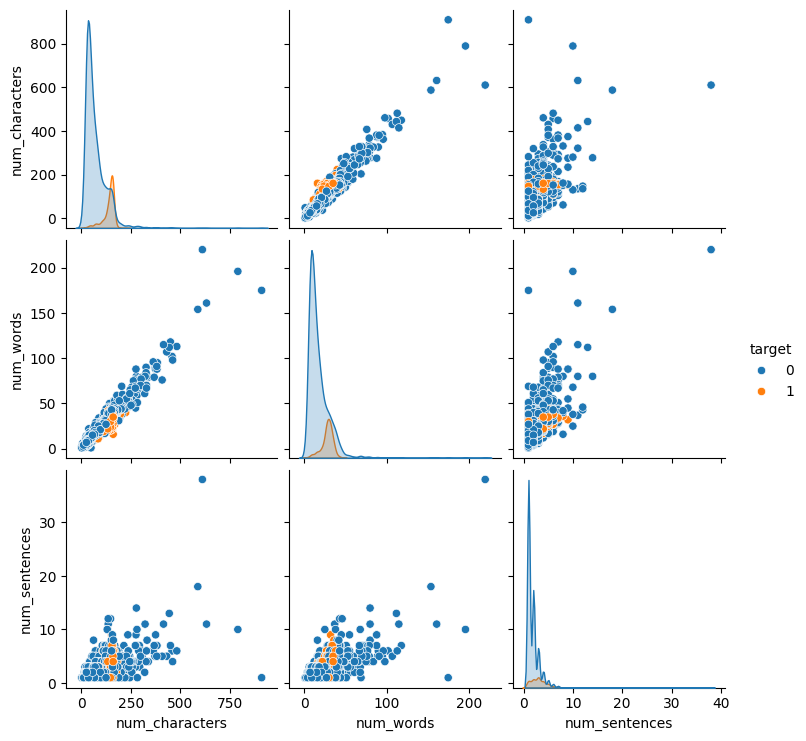

In [38]:
sns.pairplot(df,hue='target')
plt.show()

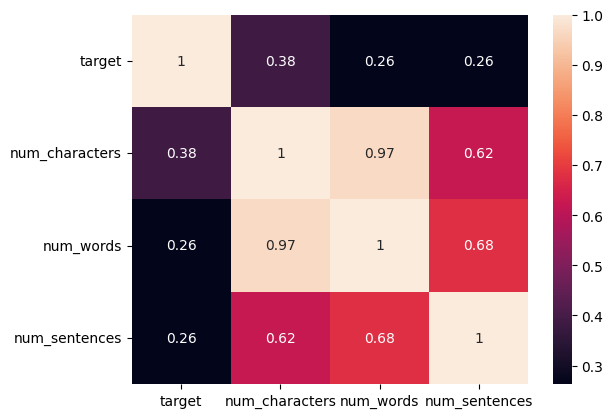

In [39]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)
plt.show()

# 3. Data Preprocessing
* Lower Case
* Tokenization
* Removing Special Characters
* Removing Stopwords and Punctuation
* Stemming

In [104]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
transformed_text('I loved the lectures on Machine Learning. What about you ? ')

'love lectur machin learn'

In [46]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=1200,height=1000,min_font_size=10,background_color='black')

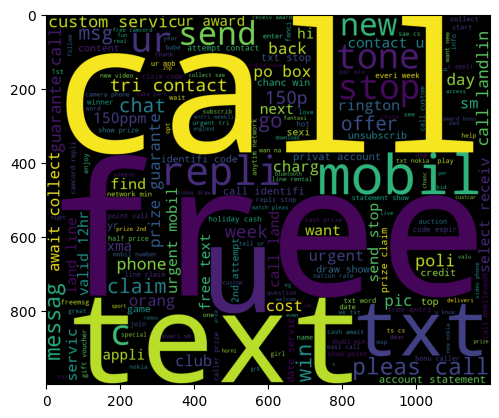

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

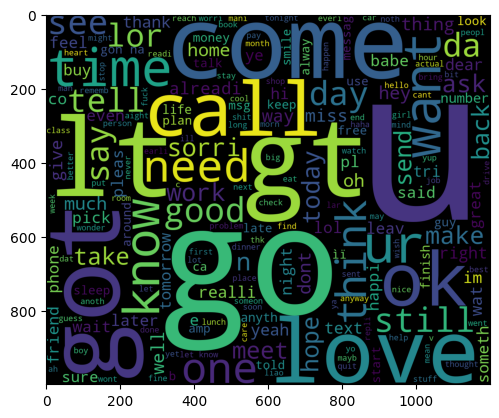

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [53]:
len(spam_corpus)

9939

In [90]:
from collections import Counter
# Counter(spam_corpus).most_common(30)

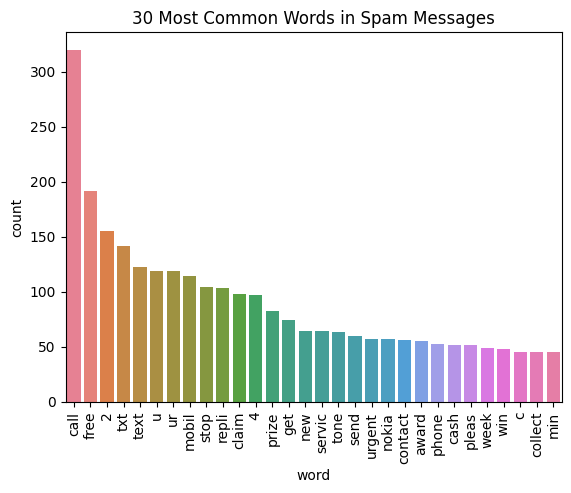

In [55]:
common_words_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
plt.xticks(rotation='vertical')
sns.barplot(x='word', y='count', data=common_words_spam,hue='word')
plt.title('30 Most Common Words in Spam Messages')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

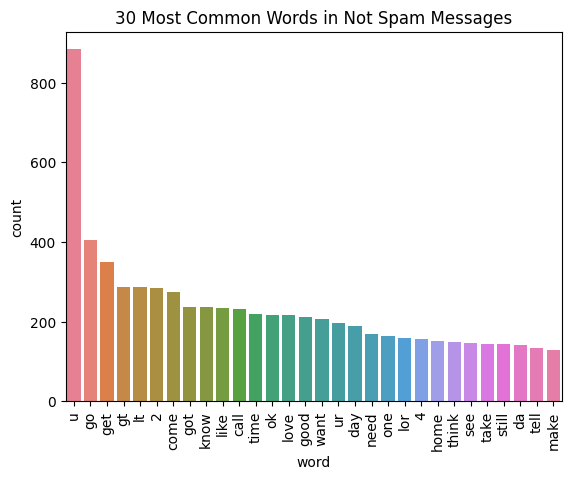

In [58]:
common_words_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
plt.xticks(rotation='vertical')
sns.barplot(x='word', y='count', data=common_words_ham,hue='word')
plt.title('30 Most Common Words in Not Spam Messages')
plt.show()

# Model Building

In [136]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [137]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [138]:
X.shape

(5169, 3000)

In [139]:
y = df['target'].values

In [140]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [144]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [146]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [147]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [148]:
# tfidf mnb

In [164]:
input_sms = input("Enter the message: ")
transformed_sms = transformed_text(input_sms)
vector_input = tfidf.transform([transformed_sms])
result = mnb.predict(vector_input)[0]
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Enter the message:  SIX chances to win CASH! From 100 to 20,000 po.


Spam


In [168]:
def detect(input_sms):
    input_sms = input("Enter the message: ")
    transformed_sms = transformed_text(input_sms)
    vector_input = tfidf.transform([transformed_sms])
    result = mnb.predict(vector_input)[0]
    if result == 1:
        print("Spam")
    else:
        print("Not Spam")

In [177]:
detect(input_sms)

Enter the message:  Ringtone Club: Get the UK singles chart on you


Spam
